# 1. Library Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xgboost as xgb

from sklearn.metrics import mutual_info_score, mean_squared_error
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, train_test_split,GridSearchCV
from sklearn.base import BaseEstimator

# 2. Dataset Preparation

Import dataset from CSV:

In [2]:
df = pd.read_csv("./banana.csv")

In [3]:
df.head(10)

,sample_id,variety,region,quality_score,quality_category,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,harvest_date,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
0,1,Manzano,Colombia,1.88,Processing,2.11,Turning,16.83,3.53,21.44,146.92,2023-10-16,13.7,58.2,2440.5,183.6
1,2,Plantain,Guatemala,2.42,Processing,4.25,Ripe,16.73,4.09,26.11,160.48,2023-10-14,5.1,280.2,2374.6,109.8
2,3,Burro,Ecuador,3.57,Premium,6.24,Overripe,21.34,1.63,25.20,225.27,2023-09-08,17.7,1246.9,1191.5,147.7
3,4,Manzano,Ecuador,2.21,Processing,5.39,Ripe,16.75,3.31,13.08,137.80,2023-10-07,13.0,1150.2,2845.1,92.8
4,5,Red Dacca,Ecuador,2.35,Processing,5.84,Ripe,16.90,3.07,12.98,227.84,2023-10-02,4.8,526.0,2136.9,129.7
5,6,Fehi,Costa Rica,2.72,Good,4.95,Ripe,20.32,4.25,15.36,94.98,2023-10-06,19.3,565.2,1727.5,74.7
6,7,Burro,Brazil,2.44,Processing,5.15,Ripe,18.15,4.58,17.22,212.06,2023-09-04,11.3,800.3,2513.1,67.2
7,8,Burro,Costa Rica,3.06,Good,6.10,Overripe,20.44,0.55,18.17,224.08,2023-10-27,3.3,0.4,1514.7,119.9
8,9,Manzano,Brazil,1.82,Processing,2.50,Turning,15.46,3.53,23.59,110.91,2023-10-05,13.3,361.9,2387.0,104.6
9,10,Lady Finger,Honduras,2.02,Processing,3.94,Turning,18.41,0.73,11.13,153.16,2023-09-02,6.6,312.3,1079.4,120.1


16 columns and 1000 rows

In [4]:
df.shape

(1000, 16)

In [5]:
df.dtypes

sample_id               int64
variety                object
region                 object
quality_score         float64
quality_category       object
ripeness_index        float64
ripeness_category      object
sugar_content_brix    float64
firmness_kgf          float64
length_cm             float64
weight_g              float64
harvest_date           object
tree_age_years        float64
altitude_m            float64
rainfall_mm           float64
soil_nitrogen_ppm     float64
dtype: object

# 3. Data Cleaning

Checking if there is any null value

In [6]:
df.isnull().sum()

sample_id             0
variety               0
region                0
quality_score         0
quality_category      0
ripeness_index        0
ripeness_category     0
sugar_content_brix    0
firmness_kgf          0
length_cm             0
weight_g              0
harvest_date          0
tree_age_years        0
altitude_m            0
rainfall_mm           0
soil_nitrogen_ppm     0
dtype: int64

Delete 'sample_id' because we don't need that

In [7]:
del df['sample_id']

Column names already lower and using _ as space, so I do it with string-type value:

In [8]:
str_cols = df.select_dtypes(include=['object', 'string']).columns.to_list()
num_cols = df.select_dtypes(exclude=['object','string']).columns.to_list()

In [9]:
for col in str_cols:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [10]:
for col in str_cols:
    print(df[col].value_counts())
    print('\n')

variety
plantain       146
fehi           134
cavendish      133
burro          125
manzano        119
lady_finger    117
red_dacca      113
blue_java      113
Name: count, dtype: int64


region
ecuador        137
colombia       136
india          133
costa_rica     130
philippines    127
guatemala      126
honduras       107
brazil         104
Name: count, dtype: int64


quality_category
processing    506
good          434
unripe         35
premium        25
Name: count, dtype: int64


ripeness_category
ripe        349
turning     310
green       174
overripe    167
Name: count, dtype: int64


harvest_date
2023-10-30    28
2023-09-25    26
2023-09-30    26
2023-09-27    24
2023-09-04    24
              ..
2023-10-28    10
2023-09-11     9
2023-09-13     9
2023-09-06     9
2023-10-20     6
Name: count, Length: 61, dtype: int64




# 4. Exploratory Data Analysis

Visualizes banana quality category distribution.

<Axes: xlabel='quality_category', ylabel='Count'>

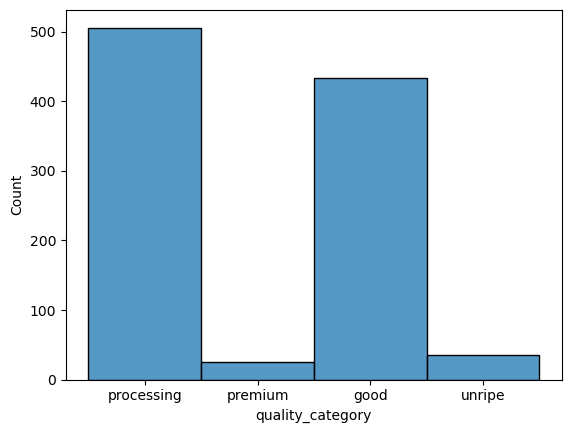

In [ ]:
sns.histplot(df.quality_category)

**Conclusion:**
- Processing and Good account for the majority of Banana Quality Category.
- Premium and Unripe are the minorty.

<Axes: xlabel='ripeness_category', ylabel='Count'>

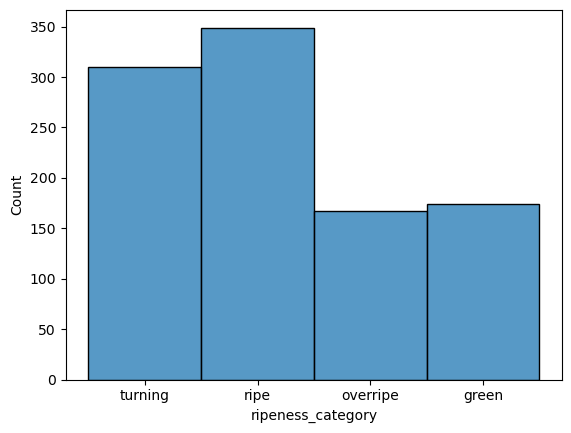

In [14]:
sns.histplot(df.ripeness_category)

**Conclusion:**
- Most of banana ripness are ripe and turning.

<Axes: xlabel='count', ylabel='region'>

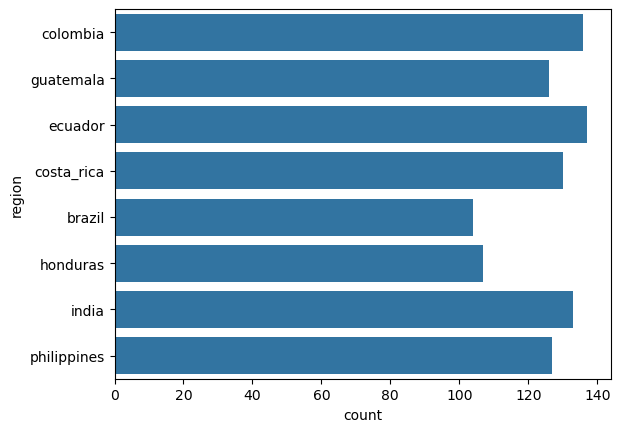

In [15]:
sns.countplot(df.region)

**Conclusion:**
- Region is equally distributed, range from 120 to 140 bananas for each country.
- Brazil and Honduras have lowest count of banana, just above 100.

<Axes: xlabel='count', ylabel='variety'>

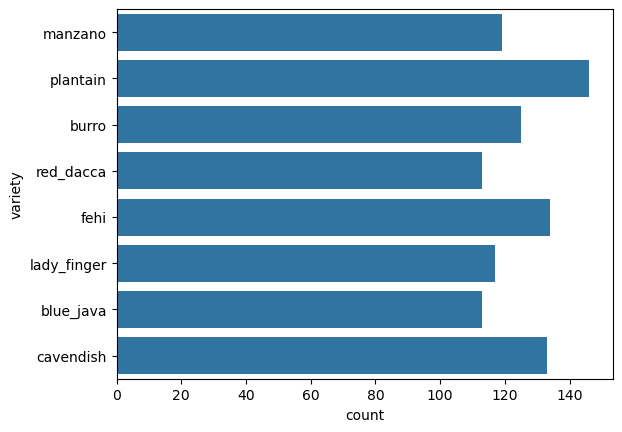

In [16]:
sns.countplot(df.variety)

**Conclustion:**
- All varieties are equally distributed.

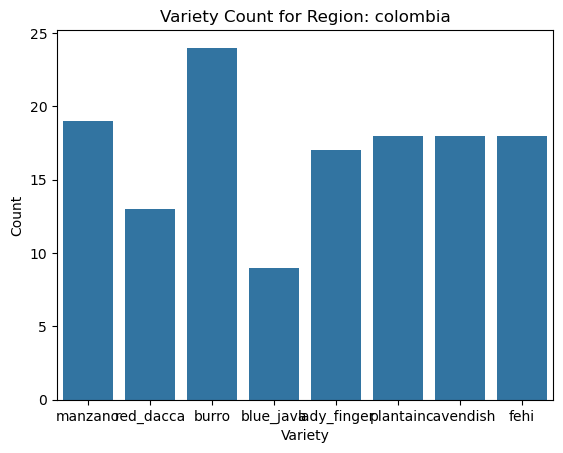

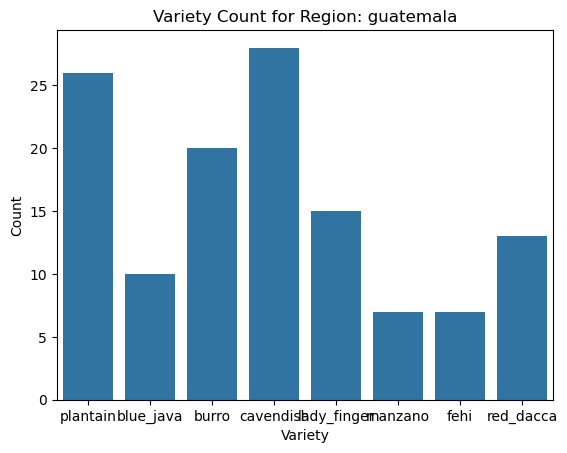

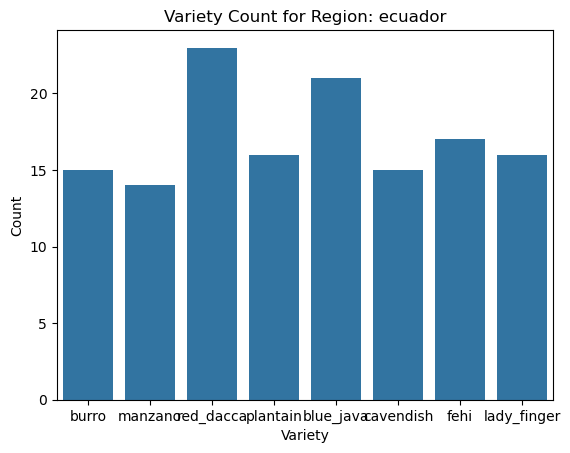

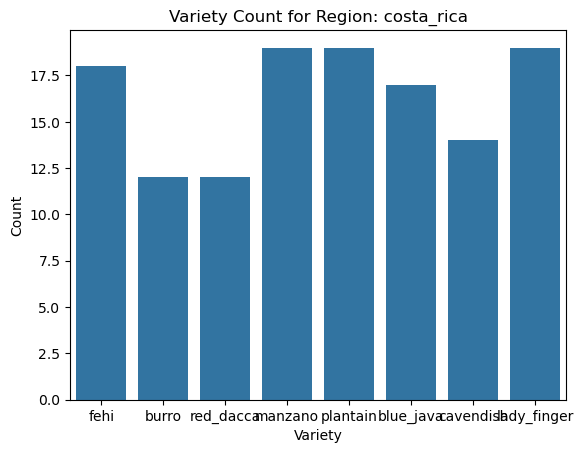

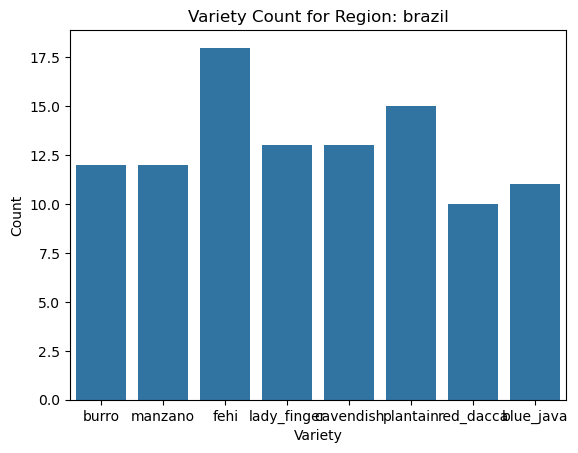

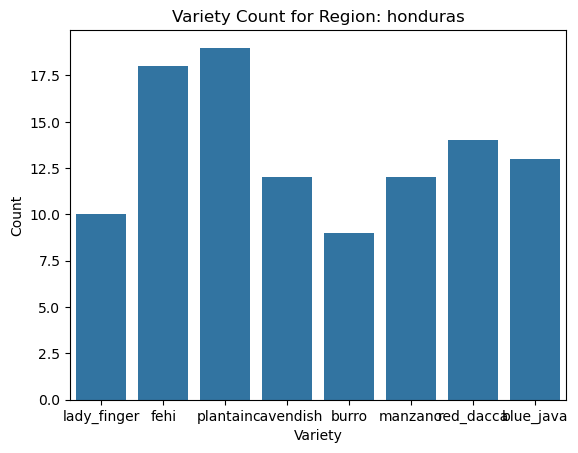

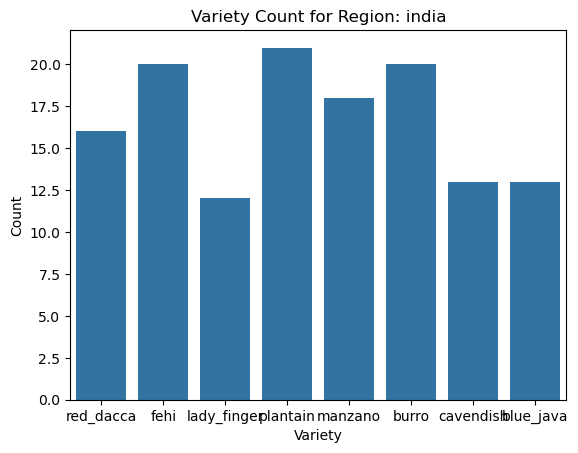

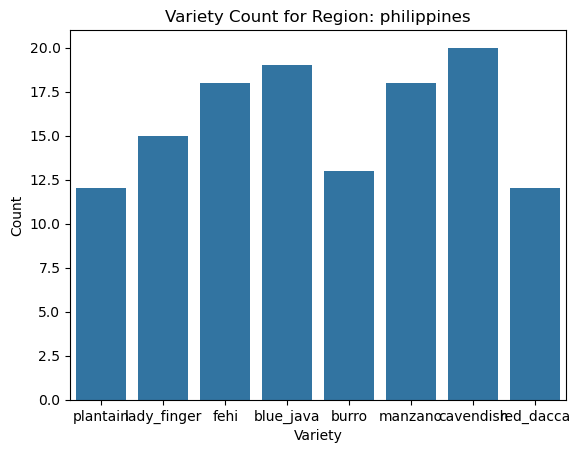

In [17]:
for region in df.region.unique():
    region_data = df[df['region'] == region]
    sns.countplot(x='variety', data=region_data)
    plt.title(f"Variety Count for Region: {region}")
    plt.xlabel("Variety")
    plt.ylabel("Count")
    plt.show()

**Conclusion:**

**Columbia:**
- Burro banana takes the large proportion.

**Guatemala:**
- Cavendish and plantain are the largest.

**Ecuador:**
- Red Dacca and Blue Java have the most amount.

**Costa Rica**:
- Burro and Red Dacca are the lowest, 12 banana for each.

**Brazil:**
- With 18 Fehi banana, this variety take up the most.

**Honduras:**
- Fehi and Plantain occupy the majority, with more or less 18 banana.

**India:**
- Lady Finger, Cavendish and Blue Java are the lowest, mere around 13 bananas.

**Philippines:**
- Plaintain, Burro and Red Dacca are the lowest, mere around 13 bananas.

In [18]:
print('quality_score:')
for quality_category in df.quality_category.unique():
    df_temp = df[df['quality_category'] == quality_category]
    print(f"\t{quality_category} from {df_temp.quality_score.min()} to {df_temp.quality_score.max()}")
    

quality_score:
	processing from 1.51 to 2.5
	premium from 3.51 to 3.89
	good from 2.51 to 3.5
	unripe from 0.92 to 1.5


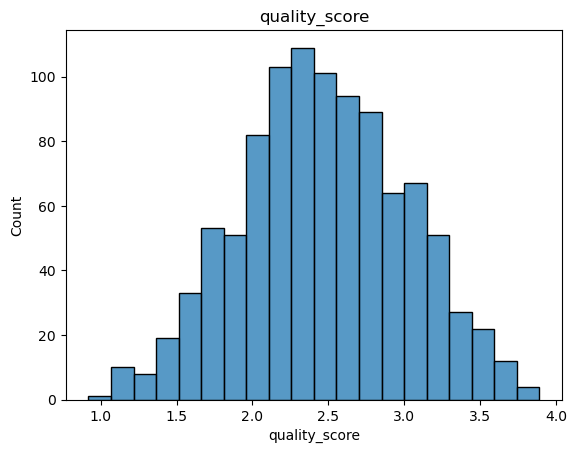

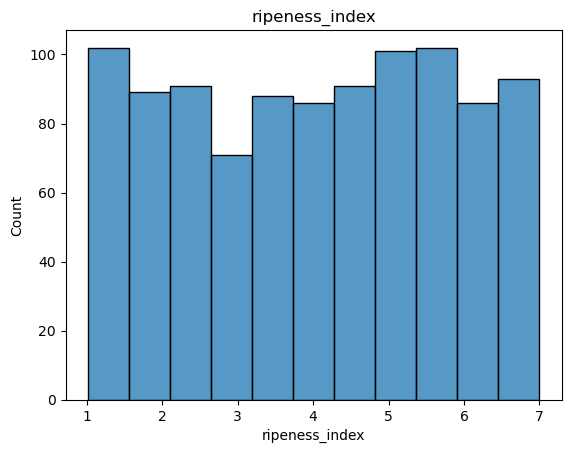

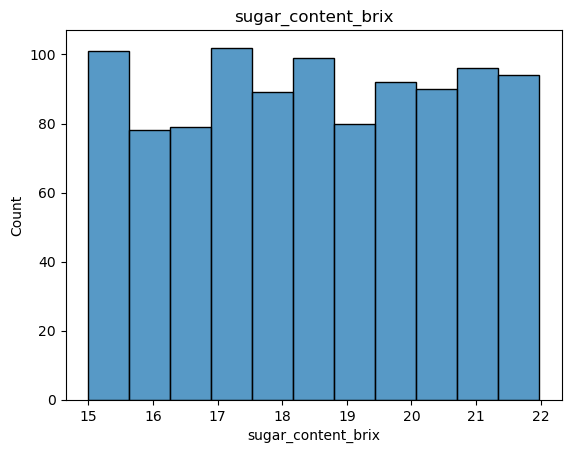

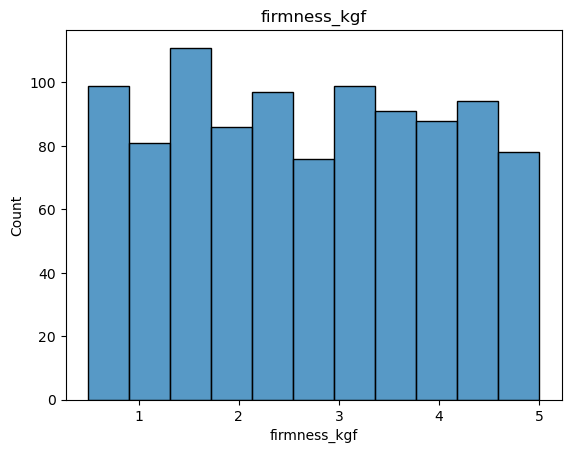

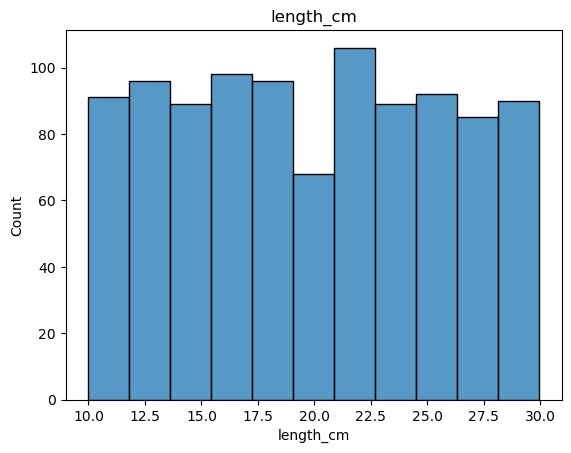

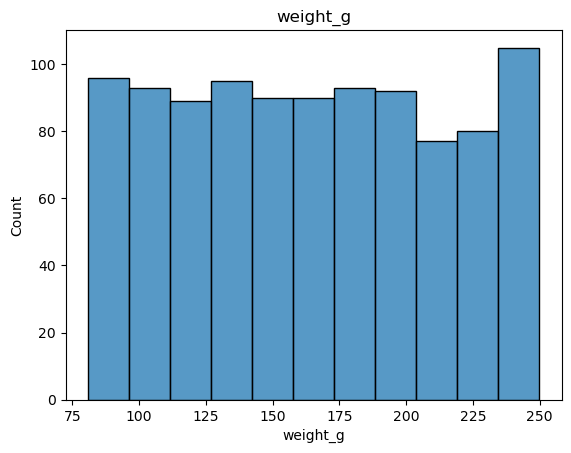

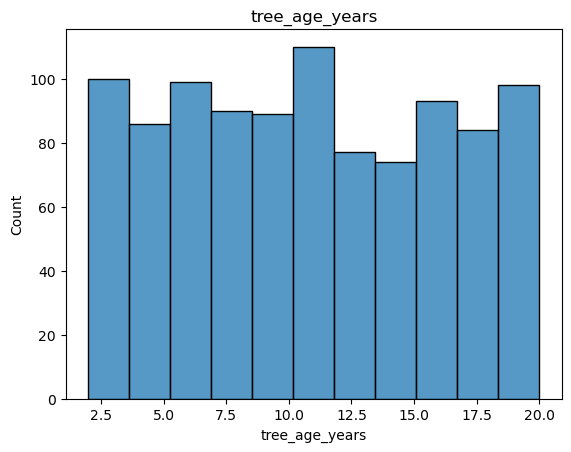

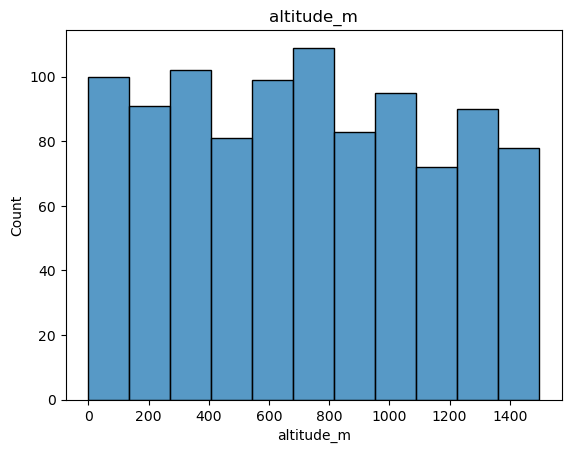

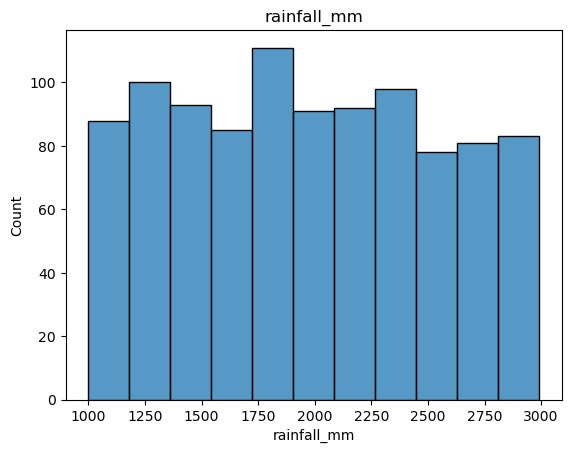

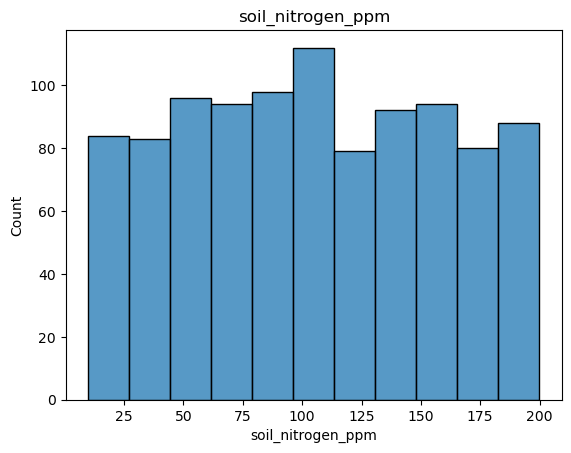

In [19]:
for col in num_cols:
    temp = df[col]
    sns.histplot(data = temp)
    plt.title(col)
    plt.show()

**Conclusion:**
- All numeric attribute are evenly distributed

## 4.1. Feature Importance

Correlation

In [20]:
df[num_cols].corrwith(df.quality_score).to_frame('correlation')

,correlation
quality_score,1.000000
ripeness_index,0.679778
sugar_content_brix,0.602842
firmness_kgf,-0.067945
length_cm,0.439203
weight_g,-0.014571
tree_age_years,0.022158
altitude_m,0.005179
rainfall_mm,0.011419
soil_nitrogen_ppm,-0.039381


**Conclusion:**
- Ripeness Index, Sugar Content Brix, Length Cm are the highest correlated attributes.

In [21]:
def calculate_mi(series):
    return mutual_info_score(series, df.quality_score)
# Với mỗi cột nằm trong categorical, apply hàm calculate_mi.
df_mi = df[str_cols].apply(calculate_mi)
# df_mi sort value giảm dần, trả về Series và to_frame để chuyển về df
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
display(df_mi)

c:\Users\super\miniconda3\envs\py311\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
c:\Users\super\miniconda3\envs\py311\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
c:\Users\super\miniconda3\envs\py311\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
c:\Users\super\miniconda3\envs\py311\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous 

,MI
harvest_date,2.485551
quality_category,0.916517
region,0.789479
variety,0.775748
ripeness_category,0.547040


**Conclustion:**
- Harvest date has the highest score, the second highest is Quality Category.

# 5. Setting Up Validation Framework

Train, test, validation split

In [ ]:
# 8 phần để train, 2 để test
df_train_full, df_test = train_test_split(df, test_size=0.2) #Random state is seed
# Trong 8 để train lại tách tiếp
df_train, df_val = train_test_split(df_train_full, test_size=0.33)

y_train = df_train.quality_score.values
y_val = df_val.quality_score.values
y_test = df_test.quality_score.values


**Remove:**
- Quality Category, Quality Score: Because this is y value.
- Harvest Date: During K-Fold Cross Validation, there will be cases that some bananas don't have there havest date in OneHot Encoding Attribute.

In [23]:
if str_cols.__contains__('quality_category'):
    str_cols.remove('quality_category')
    print('Remove quality_category')
if str_cols.__contains__('harvest_date'):
    str_cols.remove('harvest_date')
    print('Remove harvest_date')

if num_cols.__contains__('quality_score'):
    num_cols.remove('quality_score')
    print('Remove quality_score')


Remove quality_category
Remove harvest_date
Remove quality_score


# 5. Evaluate Model

## 5.1. Linear Regression

In [24]:
def train(df, y):
    cat = df.to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LinearRegression()
    model.fit(X, y)

    return dv, model


def predict(df, dv, model):
    cat = df.to_dict(orient='records')
    
    X = dv.transform(cat)

    y_pred = model.predict(X)

    return y_pred

In [25]:
kfold = KFold(n_splits=10, shuffle=True)

In [26]:
def k_fold_rmse_model(df_train_full: pd.DataFrame,
                      kfold: KFold,
                      str_cols: list | np.ndarray,
                      num_cols: list | np.ndarray,
                      train: callable,
                      predict: callable,
                      ):
    rmses = []
    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        y_train = df_train.quality_score.values
        df_train = df_train[str_cols+num_cols]

        df_val = df_train_full.iloc[val_idx]
        y_val = df_val.quality_score.values
        df_val = df_val[str_cols+num_cols]

        dv, model = train(df_train, y_train)
        y_pred = predict(df_val, dv, model)

        rmse = mean_squared_error(y_pred=y_pred, y_true=y_val)
        rmses.append(rmse)
    return rmses
rmses_linear = k_fold_rmse_model(df_train_full, kfold,str_cols,num_cols,train, predict)

In [27]:
np.mean(rmses_linear)

0.005181851468823298

## 5.2. k-NN

In [28]:
def tuning(df_train_full: pd.DataFrame,
           num_cols:list|np.ndarray,
           str_cols:list|np.ndarray,
           param_grid: dict,
           model: BaseEstimator
           ):
    y = df_train_full.quality_score.values
    df_train_full = df_train_full[num_cols+str_cols]

    cat = df_train_full.to_dict(orient = 'records')
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)
    X = dv.transform(cat)
    
    grid_search = GridSearchCV(
        estimator = model,
        param_grid=param_grid,
        scoring='neg_mean_squared_error',
        cv = 10,
        verbose=1
    )
    grid_search.fit(X, y)
    return grid_search
    

In [29]:
np.arange(2,25,2)

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24])

In [30]:
param_grid = {
    'n_neighbors': np.arange(24,300,10),          
    'weights': ['uniform', 'distance'],     
    'metric': ['minkowski', 'euclidean', 'manhattan'],  
    'leaf_size': [10, 20, 30, 40],              
    'p': [1, 2]                             
}

model = KNeighborsRegressor()
knn_tuning_result = tuning(df_train_full,
                           num_cols,
                           str_cols,
                           param_grid,
                            model
                           )

Fitting 10 folds for each of 1344 candidates, totalling 13440 fits


c:\Users\super\miniconda3\envs\py311\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [31]:
knn_tuning_result.best_estimator_


KNeighborsRegressor(leaf_size=10, n_neighbors=254, p=1, weights='distance')

In [32]:
knn_tuning_result.best_score_

-0.2844089027851298

# 5.3. Decision Tree

In [33]:
param_grid = {
    'criterion': ['squared_error', 'friedman_mse'],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': list(range(2,20,3)),
    'min_samples_leaf': list(range(2,20,3)),
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20],
    'splitter': ['best', 'random']
}

model = DecisionTreeRegressor()
dt_tuning_result = tuning(df_train_full,
                           num_cols,
                           str_cols,
                           param_grid,
                            model
                           )

Fitting 10 folds for each of 5184 candidates, totalling 51840 fits


In [34]:
dt_tuning_result.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 5,
 'min_samples_split': 11,
 'splitter': 'best'}

In [35]:
dt_tuning_result.best_score_

-0.02344349126854214

## 5.4. XGBoost

In [36]:
param_grid = param_grid = {
    'criterion': ['mse', 'friedman_mse'],  # Loss function for regression
    'max_depth': [3, 5, 10, None],  # Depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at leaf nodes
    'max_features': [None, 'sqrt', 'log2'],  # Features to consider for best split
    'splitter': ['best', 'random'],  # Splitting strategy
}
xg_reg = xgb.XGBRegressor(objective='reg:squarederror')
xgb_tuning_result = tuning(df_train_full,
                           num_cols,
                           str_cols,
                           param_grid,
                            model
                           )

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


c:\Users\super\miniconda3\envs\py311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
2160 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2160 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\super\miniconda3\envs\py311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\super\miniconda3\envs\py311\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\super\miniconda3\envs\py311\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraint

In [37]:
xgb_tuning_result.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'splitter': 'best'}

In [38]:
xgb_tuning_result.best_score_

-0.023570638817200496

RMSE:
- Linear Regression: 0.005
- k-NN: 0.284
- Decision Tree: 0.023
- XGBoost: 0.023

**Linear Regression is the best model.**